In [2]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Parte 1

### 1.

In [4]:
def rgb_to_chromatic(img):
  img = img / 255.0

  r, g, b = cv2.split(img)
  sum_rgb = r + g + b
  sum_rgb[sum_rgb == 0] = 1

  chromatic_r = (r / sum_rgb) * 255.0
  chromatic_g = (g / sum_rgb) * 255.0
  chromatic_b = (b / sum_rgb) * 255.0

  return cv2.merge((chromatic_r, chromatic_g, chromatic_b))

### 2.

In [5]:
def white_patch(img):
  r, g, b = cv2.split(img)

  max_r = np.max(r)
  max_g = np.max(g)
  max_b = np.max(b)

  white_patch_r = 255 / max_r * r
  white_patch_g = 255 / max_g * g
  white_patch_b = 255 / max_b * b

  return cv2.merge((white_patch_r, white_patch_g, white_patch_b))

### 3.

In [6]:
def plot_coord_chromatic(img_path):
  img = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  chromatic_img = rgb_to_chromatic(img_rgb)

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(np.array(chromatic_img,np.int32))
  plt.title('Chromatic Image')
  
  plt.show()

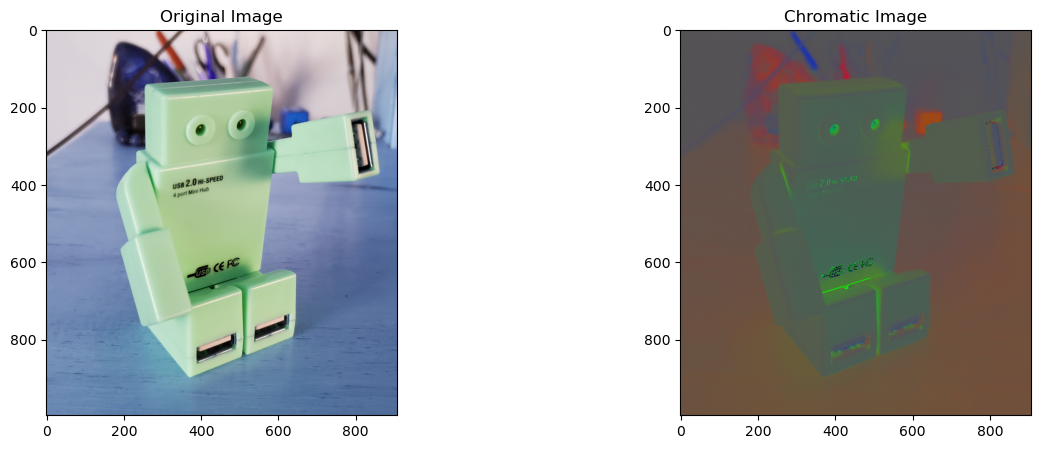

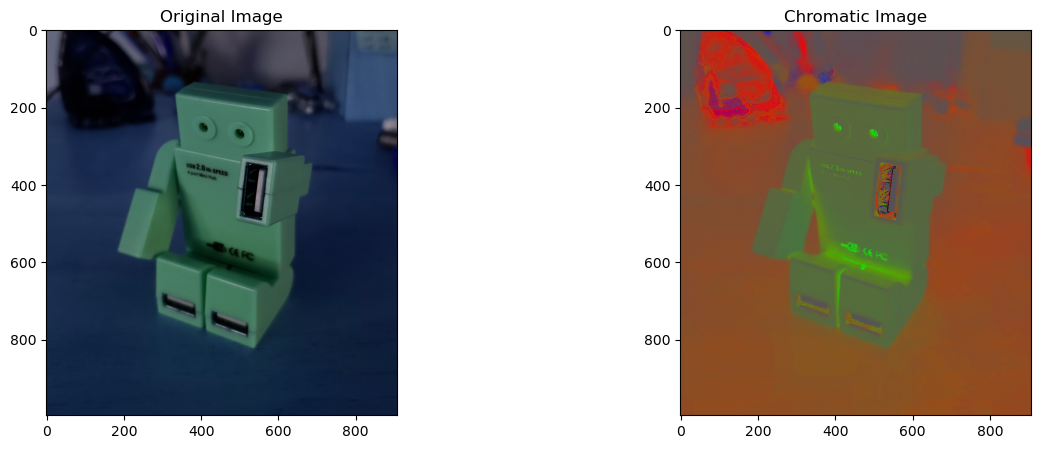

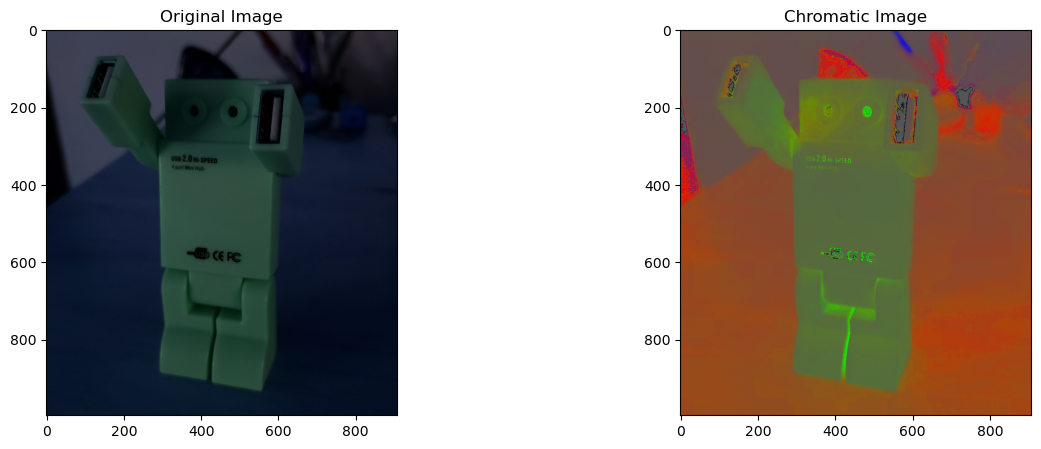

In [7]:
for i in range(1, 4):
  image_path = f'./data/coord_cromaticas/CoordCrom_{i}.png'
  plot_coord_chromatic(image_path)

In [10]:
def plot_white_patch(img_path):
  img = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  white_patch_img = white_patch(img_rgb)

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(img_rgb)
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(np.array(white_patch_img,np.int32))
  plt.title('White Patch Image')
  
  plt.show()

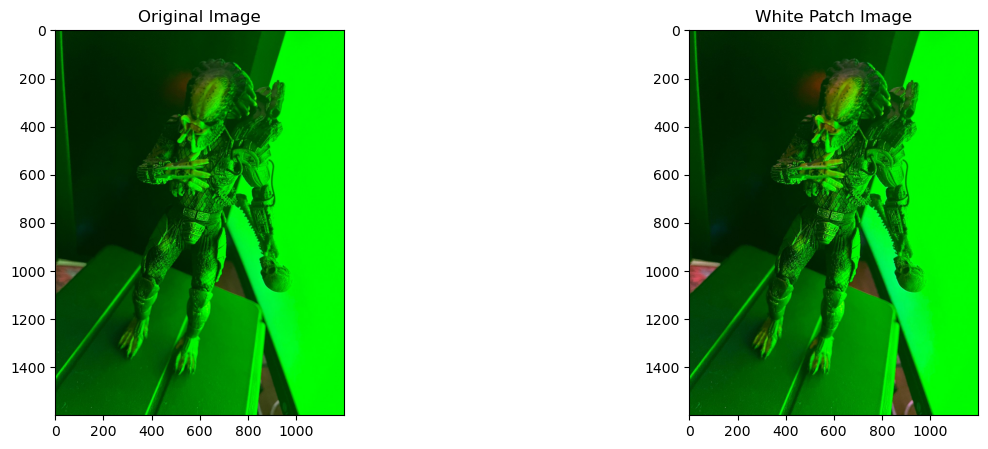

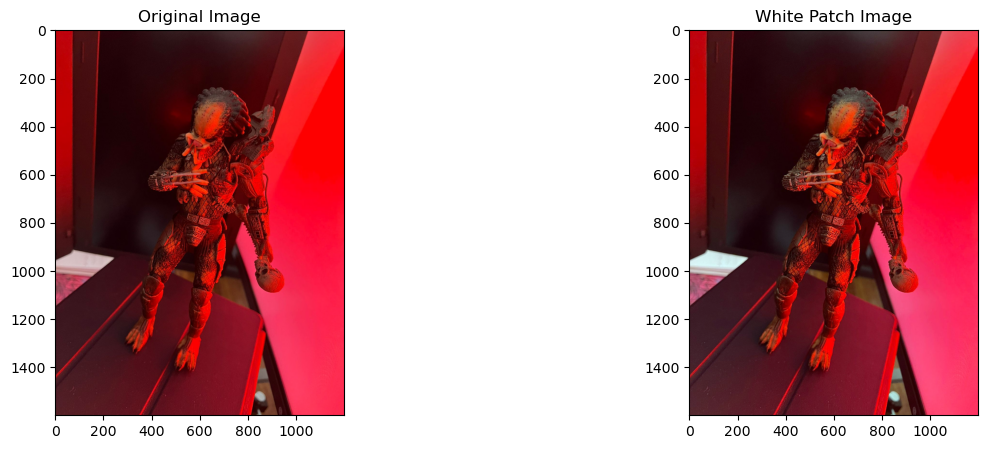

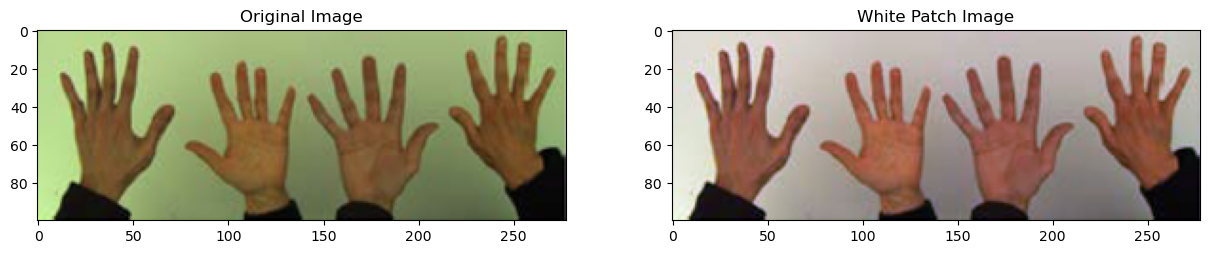

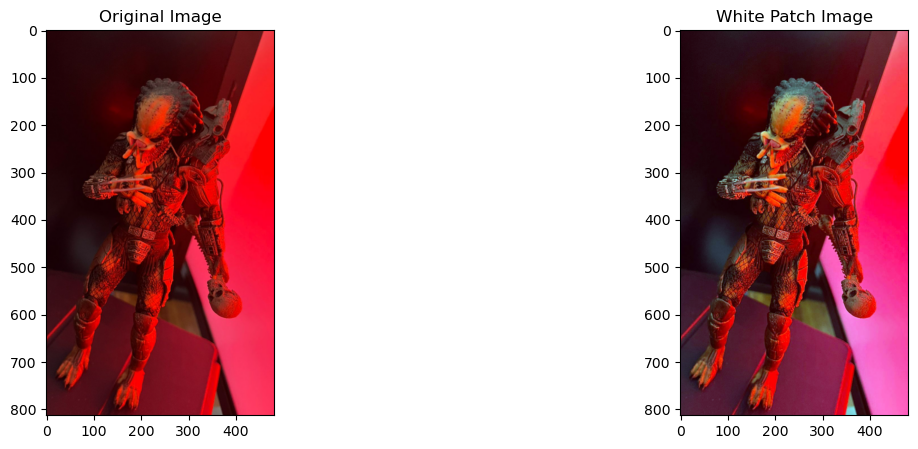

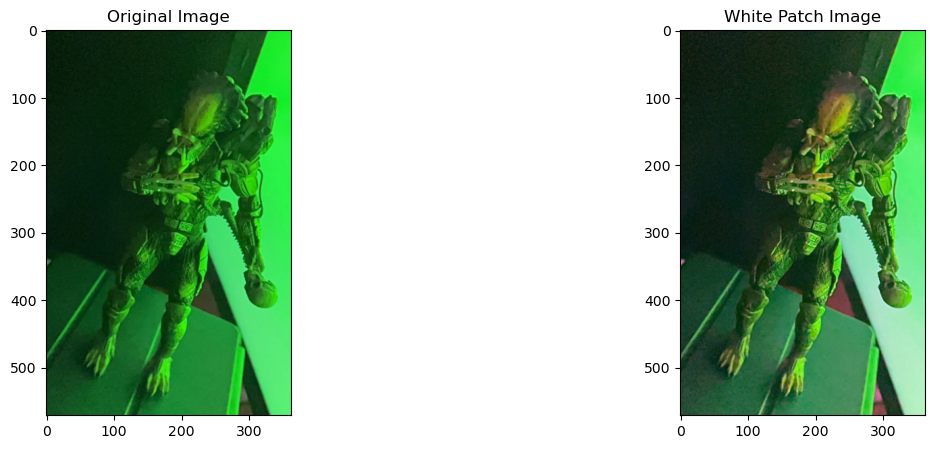

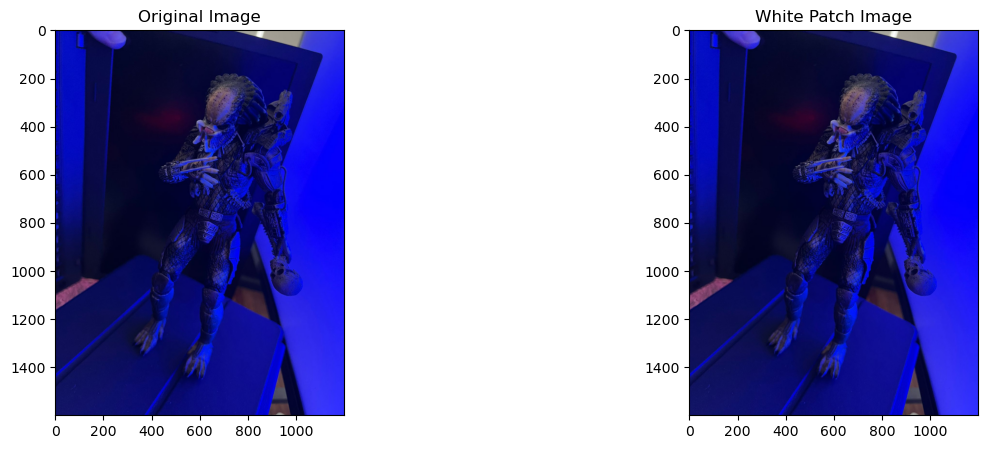

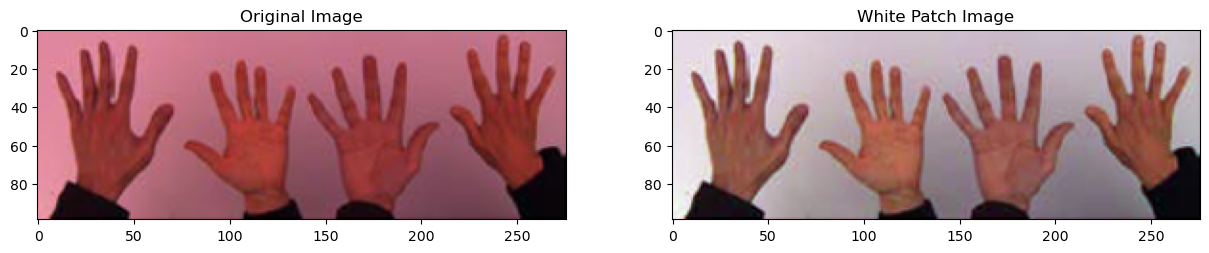

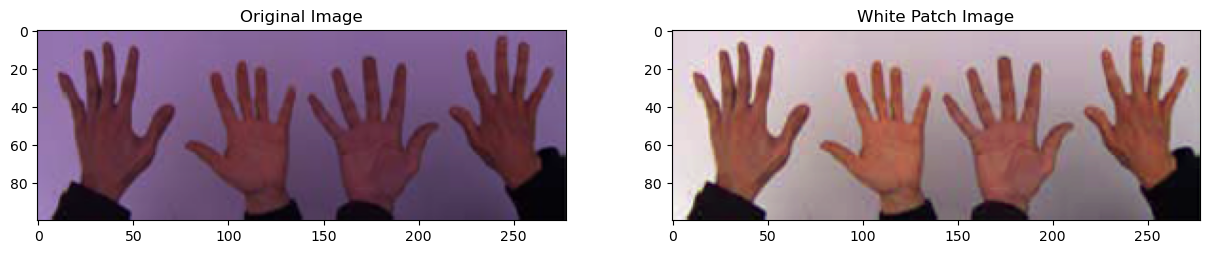

In [11]:
import os

image_names = os.listdir('./data/white_patch')
for image_name in image_names:
  plot_white_patch(f'./data/white_patch/{image_name}')

## Parte 2

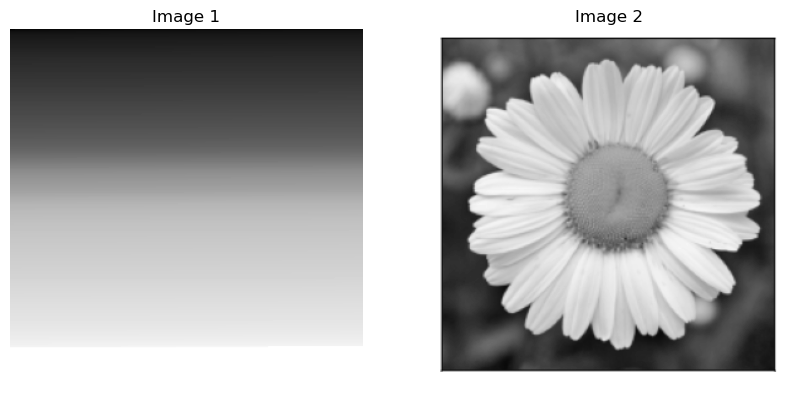

In [14]:
img1 = cv2.imread('data/img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/img2_tp.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

# Show second image
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.show()

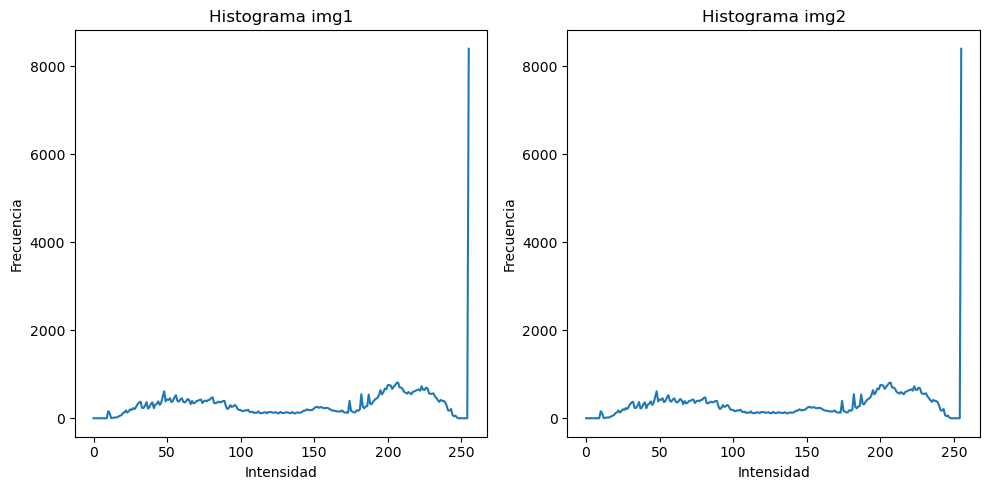

In [15]:
hist1, bins1 = np.histogram(img1.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(img2.ravel(), 256, [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Histograma img1')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins1[:-1], hist1)

plt.subplot(1, 2, 2)
plt.title('Histograma img2')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins2[:-1], hist2)

plt.tight_layout()
plt.show()

Se observan dos histogramas identicos

**Img1**:La primer imagen tiene una banda blanca sobre el final, la cual provocaria este pico en 255

**Img2**:La segunda imagen tiene una gran presencia del color blanco en los petalos y en el "marco"

Este ejemplo muestra claramente que el histograma no puede ser seleccionado como feature para clasificar o detectar las imagenes. Ambas imagenes contarian con los mismos valores para esta feature pero en la realidad representan dos objetos completamente diferentes.


In [26]:
def plot_img(img):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 1, 1)
    plt.imshow(img)
    plt.axis('off')

    plt.show()

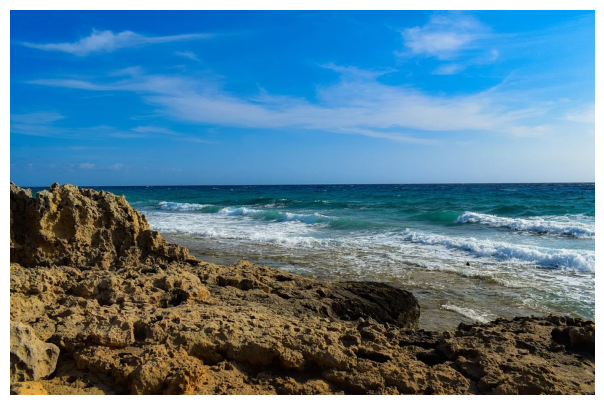

In [27]:
image = cv2.imread('data/segmentacion.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_img(image_rgb)

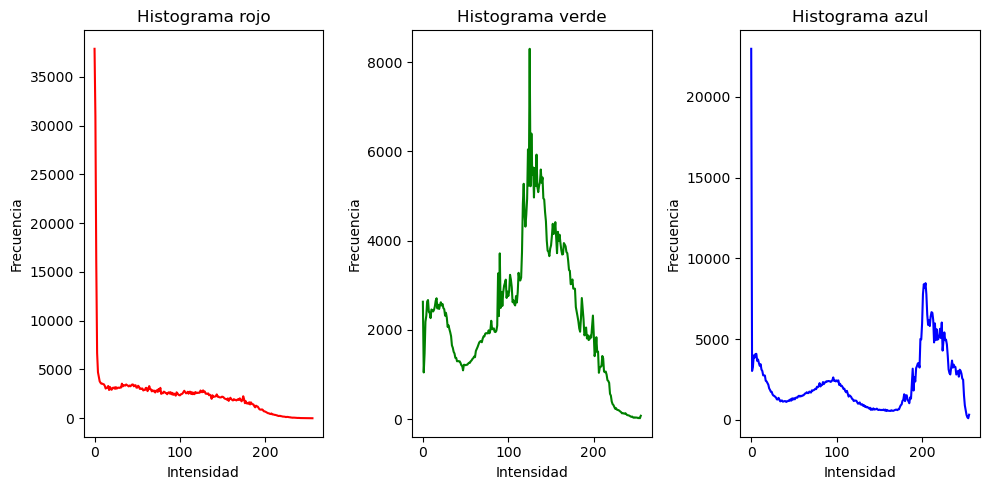

In [28]:
b, g, r = cv2.split(image)

hist_r, bins_r = np.histogram(r.ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(b.ravel(), 256, [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Histograma rojo')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins_r[:-1], hist_r, color='red')

plt.subplot(1, 3, 2)
plt.title('Histograma verde')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins_g[:-1], hist_g, color='green')

plt.subplot(1, 3, 3)
plt.title('Histograma azul')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins_b[:-1], hist_b, color='blue')

plt.tight_layout()
plt.show()

In [22]:
def segment_by_rgb(roi, sigma=3):
  color_mean, color_std = cv2.meanStdDev(roi)
  mask = cv2.inRange(image, color_mean-color_std * sigma,  color_mean+color_std * sigma)
  segmented_image = cv2.bitwise_and(image, image, mask=mask)
  return segmented_image

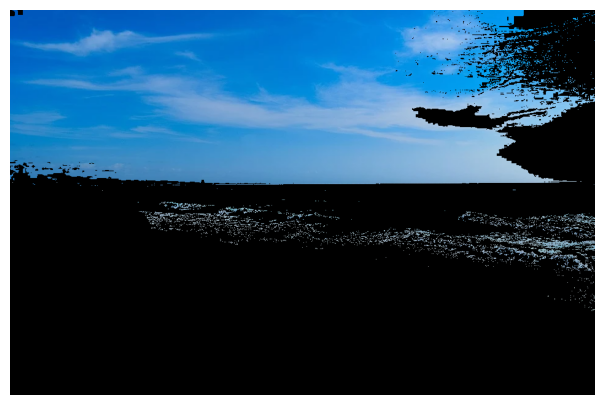

In [33]:
sky_roi = image[0:280, 0:800]
segmented_sky = segment_by_rgb(sky_roi, 2.2)
plot_img(cv2.cvtColor(segmented_sky, cv2.COLOR_BGR2RGB))

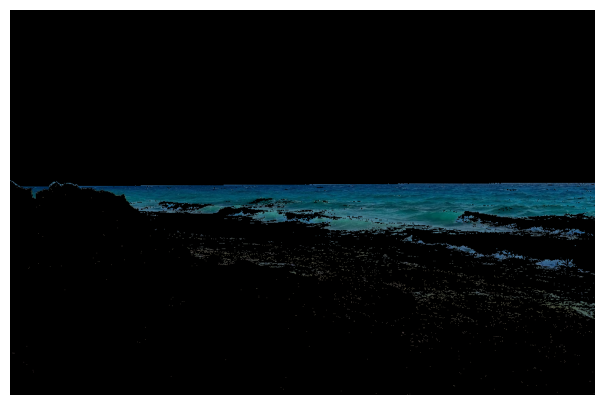

In [34]:
sea_roi = image[288:350, 500:700]
segmented_sea = segment_by_rgb(sea_roi, 2.2)
plot_img(cv2.cvtColor(segmented_sea, cv2.COLOR_BGR2RGB))

In [35]:
def plot_hsv_histograms(img):
  hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv_image)

  hist_h, bins_h = np.histogram(h.ravel(), 256, [0, 256])
  hist_s, bins_s = np.histogram(s.ravel(), 256, [0, 256])
  hist_v, bins_v = np.histogram(v.ravel(), 256, [0, 256])

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.title('Histograma Hue')
  plt.xlabel('Hue')
  plt.ylabel('Frecuencia')
  plt.plot(bins_h[:-1], hist_h, color='red')

  plt.subplot(1, 3, 2)
  plt.title('Histograma Saturation')
  plt.xlabel('Saturation')
  plt.ylabel('Frecuencia')
  plt.plot(bins_s[:-1], hist_s, color='green')

  plt.subplot(1, 3, 3)
  plt.title('Histograma Value')
  plt.xlabel('Value')
  plt.ylabel('Frecuencia')
  plt.plot(bins_v[:-1], hist_v, color='blue')

  plt.tight_layout()
  plt.show()

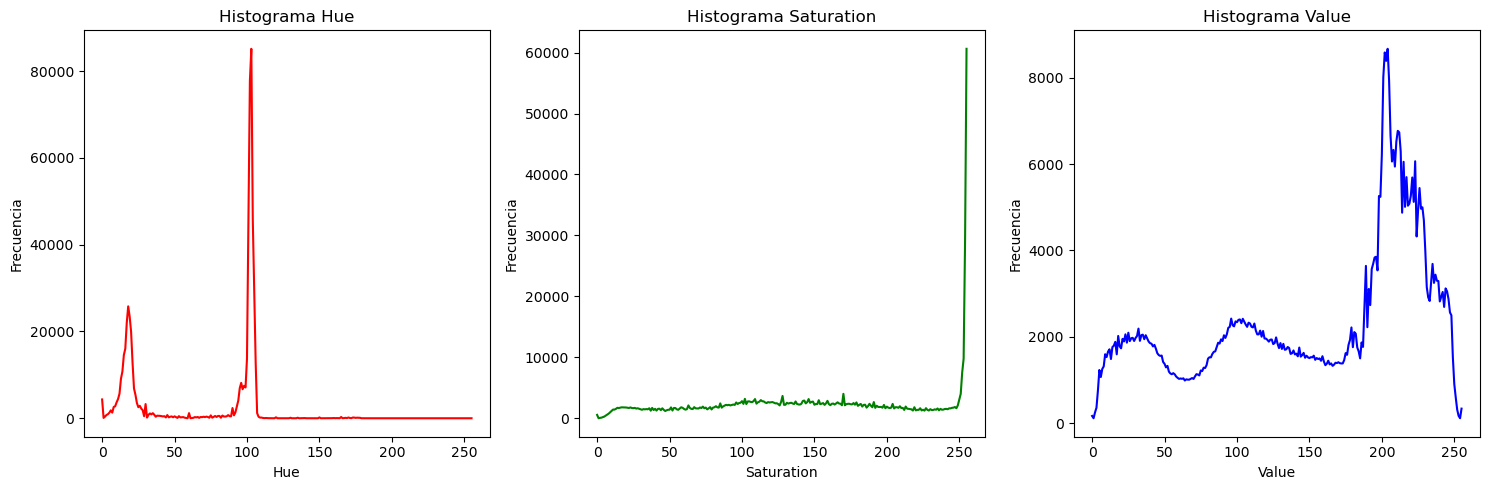

In [36]:
plot_hsv_histograms(image)

In [37]:
def segment_by_hsv(image, min_hsv=[0, 0, 0], max_hsv=[255, 255, 255]):
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  lower_bound = np.array(min_hsv)
  upper_bound = np.array(max_hsv)

  mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

  return cv2.bitwise_and(image, image, mask=mask)

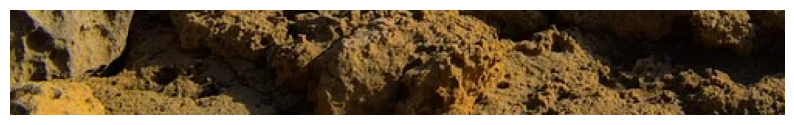

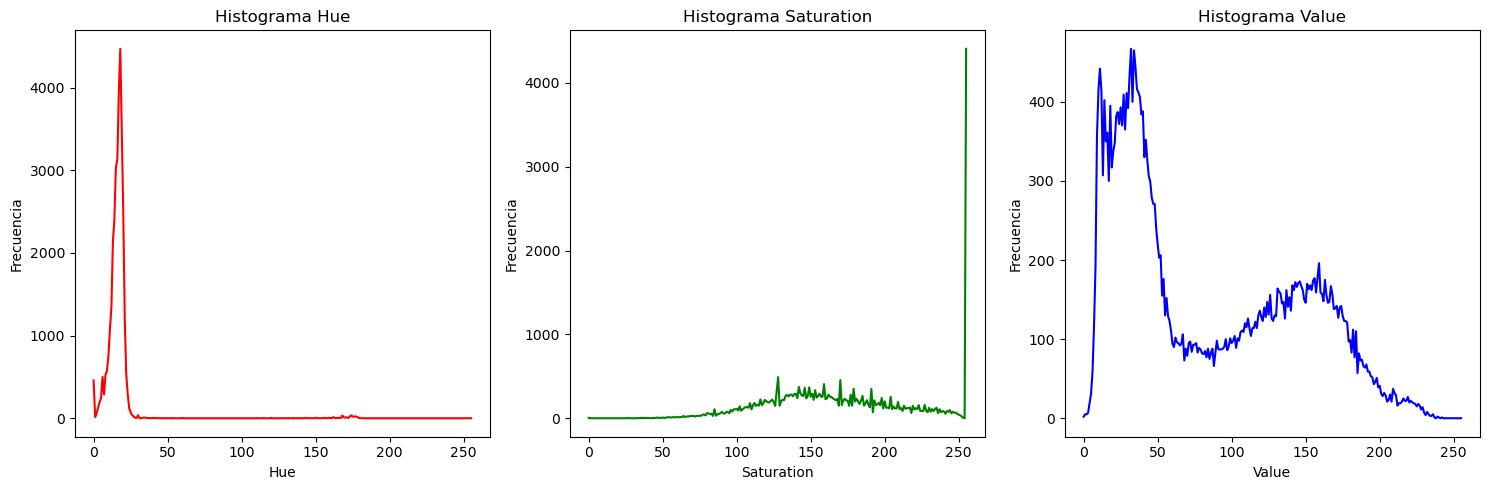

In [39]:
land_roi = image[560:628, 0:500]
plot_img(cv2.cvtColor(land_roi, cv2.COLOR_BGR2RGB))
plot_hsv_histograms(land_roi)

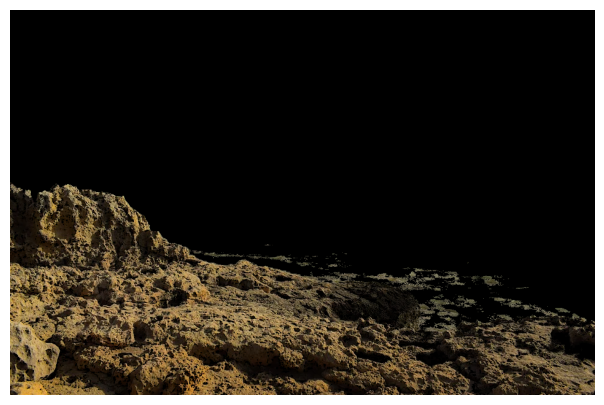

In [42]:
segmented_land = segment_by_hsv(image,[0, 50, 0], [35, 250, 255])
plot_img(cv2.cvtColor(segmented_land, cv2.COLOR_BGR2RGB))